In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_hourly = pd.read_csv('train_hourly.csv')
test_hourly = pd.read_csv('test_hourly.csv')

In [ ]:
train_preprocessed = pd.read_csv('train_preprocessed1 (7).csv')
test_preprocessed = pd.read_csv('test_preprocessed1 (7).csv')

##**Visualisasi Bagian 1: Dataset Train**##

Bagian ini dapat dikelompokkan menjadi dua tahapan, yakni Visualisasi Mendasar dan Visualisasi Lanjutan. 

Tahapan Visualisasi Dasar dilakukan untuk mengetahui dinamika fluktuasi variabel target terhadap waktu **(Time Series Analysis)**, persebaran dari fitur, khususnya yang memiliki tipe data kategorik dan korelasi antar fitur secara umum. 

Sementara itu, Visualisasi Lanjutan bertujuan untuk mengetahui korelasi antar fitur secara lebih mendalam, sehingga nantinya dapat diketahui fitur apa saja yang perlu di drop ataupun dikombinasikan menjadi fitur baru. Selain itu, tahapan ini harapannya dapat menghasilkan *insight* yang akan membantu dalam menentukan model yang tepat dalam melakukan prediksi terhadap dataset testing

**1. Boxplot: Intensitas Curah Hujan Berdasarkan Kota**

[]

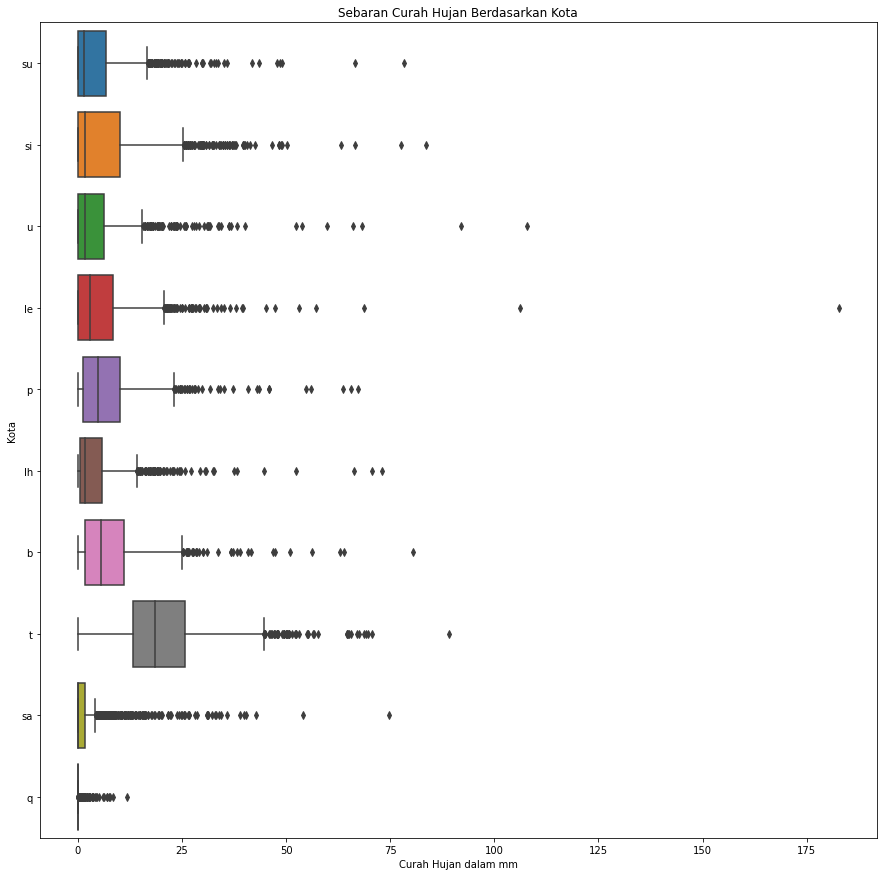

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
sns.boxplot(data = train, x = train['rain_sum (mm)'], y = train['city'])
plt.ylabel('Kota')
plt.xlabel('Curah Hujan dalam mm')
plt.title('Sebaran Curah Hujan Berdasarkan Kota')
plt.plot()

**2. Lineplot dan Barplot: Analisis Runtun Waktu terhadap Fitur Curah Hujan**

In [ ]:
from datetime import datetime

train['time'] = pd.to_datetime(train['time'])
train.set_index(train['time'], inplace = True)

Text(0.5, 1.0, 'Dinamika Curah Hujan dari Waktu ke waktu')

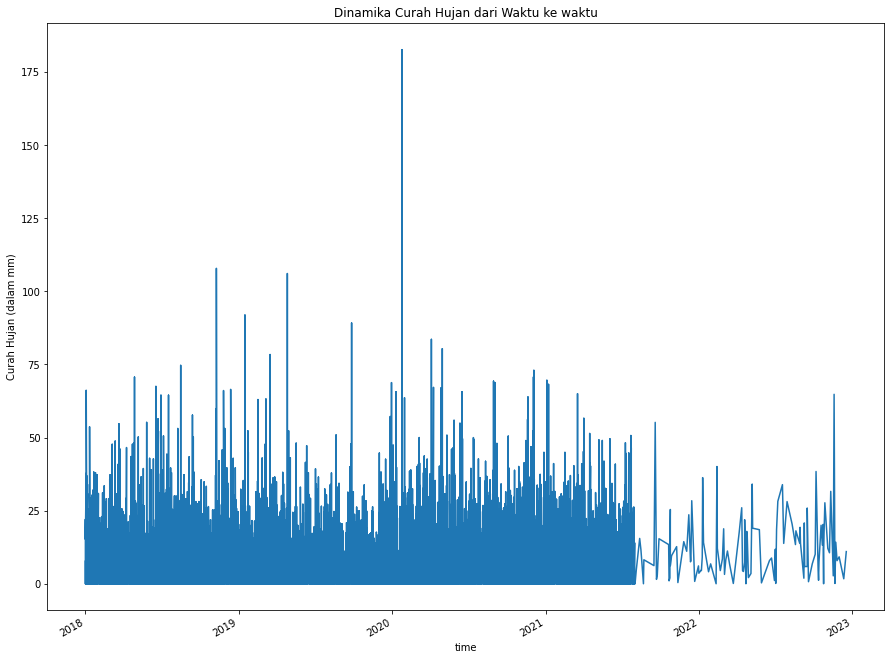

In [ ]:
plt.figure(figsize=(15,12))
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (dalam mm)')
train['rain_sum (mm)'].plot()
plt.title('Dinamika Curah Hujan dari Waktu ke waktu')

Text(0, 0.5, 'Curah Hujan (dalam mm)')

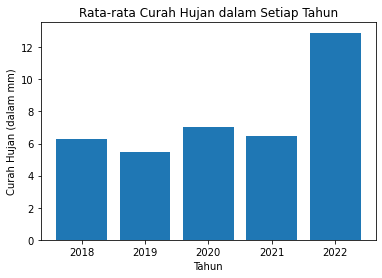

In [ ]:
x = train_preprocessed['year'].unique()
y = []

for i in train_preprocessed['year'].unique():
  y.append(train_preprocessed[train_preprocessed['year']==i]['rain_sum (mm)'].mean())

plt.bar(x, y)
plt.title('Rata-rata Curah Hujan dalam Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (dalam mm)')

Text(0, 0.5, 'Curah Hujan (dalam mm)')

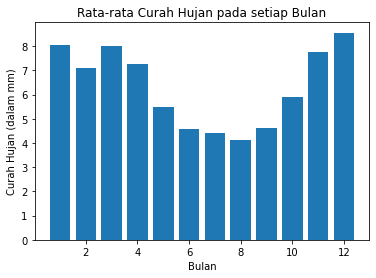

In [ ]:
x = train_preprocessed['month'].unique()
y = []

for i in train_preprocessed['month'].unique():
  y.append(train_preprocessed[train_preprocessed['month']==i]['rain_sum (mm)'].mean())

plt.bar(x, y)
plt.title('Rata-rata Curah Hujan pada setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan (dalam mm)')

Text(0.5, 0, 'Curah Hujan (dalam mm)')

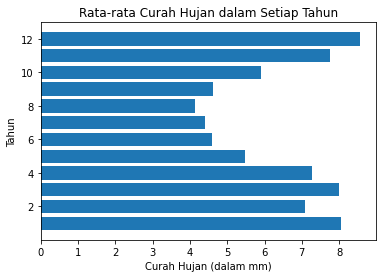

In [ ]:
plt.barh(x, y)
plt.title('Rata-rata Curah Hujan dalam Setiap Tahun')
plt.ylabel('Tahun')
plt.xlabel('Curah Hujan (dalam mm)')

Text(0.5, 0, 'Curah Hujan (dalam mm)')

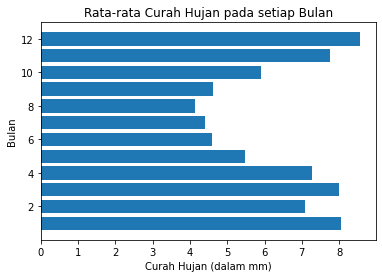

In [ ]:
x = train_preprocessed['month'].unique()
y = []

for i in train_preprocessed['month'].unique():
  y.append(train_preprocessed[train_preprocessed['month']==i]['rain_sum (mm)'].mean())

plt.barh(x, y)
plt.title('Rata-rata Curah Hujan pada setiap Bulan')
plt.ylabel('Bulan')
plt.xlabel('Curah Hujan (dalam mm)')

**3. Heatmap: Korelasi Antar Fitur Secara Umum**

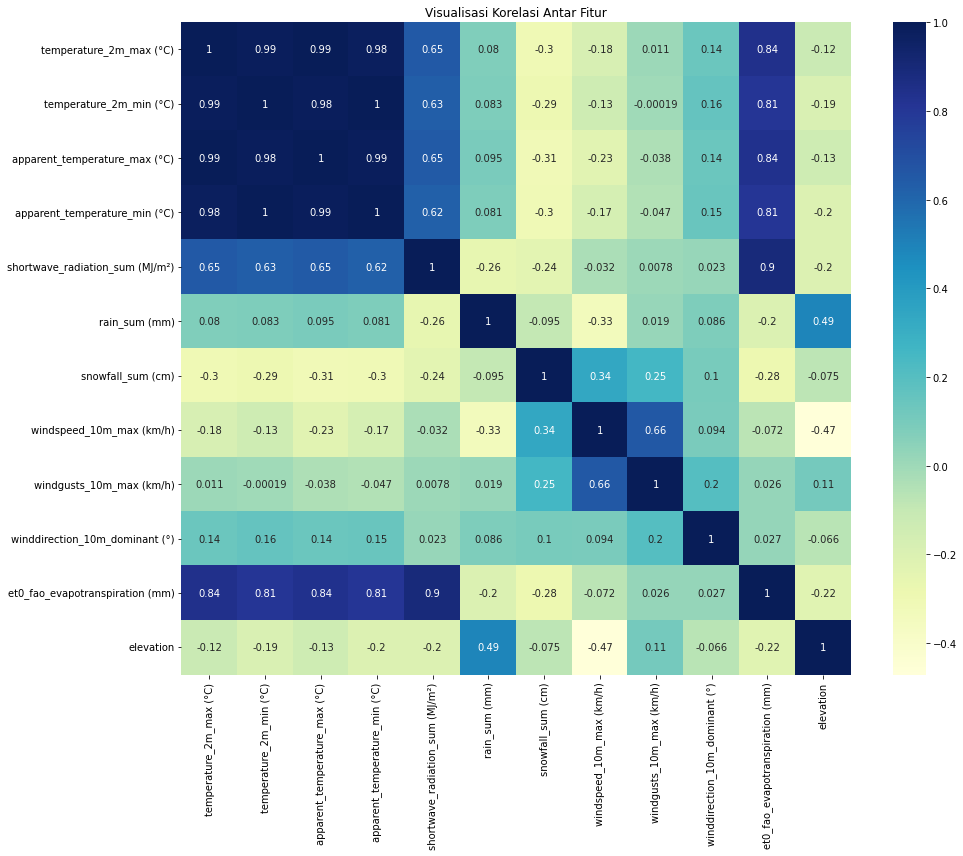

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,12))
plt.title('Visualisasi Korelasi Antar Fitur')
correlation = train.corr()
dataplot = sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

**4. Scatter Plot: Korelasi Antar Fitur Lanjutan**

In [ ]:
train_preprocessed.columns

Index(['Unnamed: 0', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'shortwave_radiation_sum (MJ/m²)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)',
       'elevation', 'city', 'year', 'month', 'date', 'sunset_preprocessed',
       'sunrise_preprocessed'],
      dtype='object')

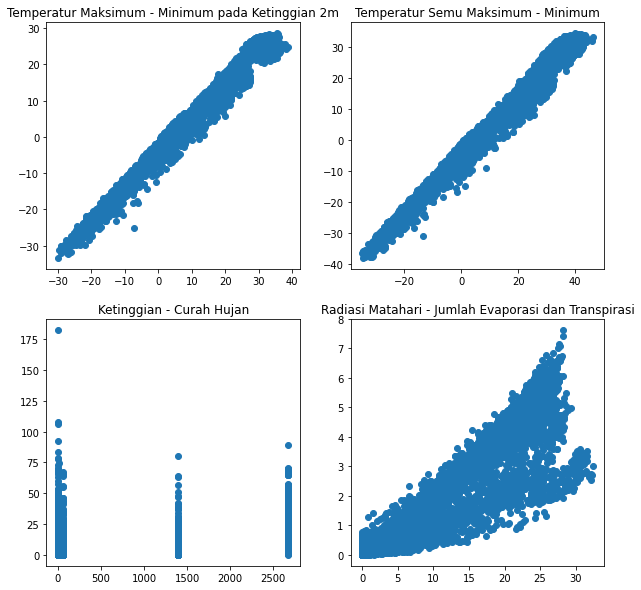

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.title.set_text('Temperatur Maksimum - Minimum pada Ketinggian 2m')
ax1.scatter(train['temperature_2m_max (°C)'], train['temperature_2m_min (°C)'])

ax2.title.set_text('Temperatur Semu Maksimum - Minimum')
ax2.scatter(train['apparent_temperature_max (°C)'], train['apparent_temperature_min (°C)'])

ax3.title.set_text('Ketinggian - Curah Hujan')
ax3.scatter(train['elevation'], train['rain_sum (mm)'])

ax4.title.set_text('Radiasi Matahari - Jumlah Evaporasi dan Transpirasi')
ax4.scatter(train['shortwave_radiation_sum (MJ/m²)'], train['et0_fao_evapotranspiration (mm)'])

plt.show()

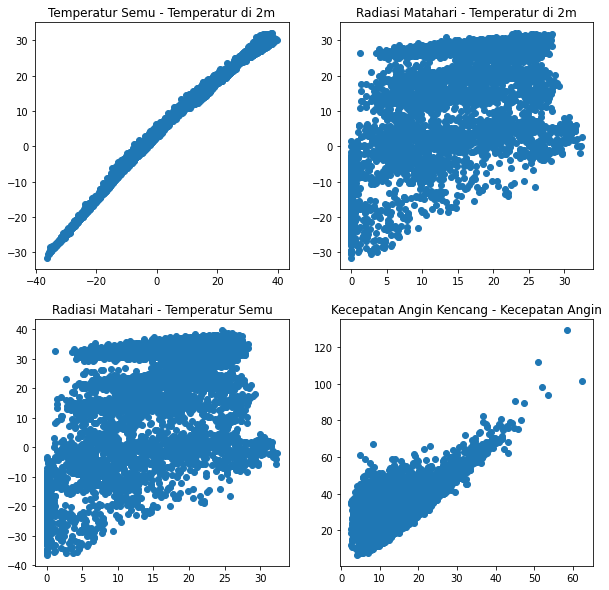

In [ ]:
#Membuat Fitur Baru
train['temperature_2m_avg'] = (train['temperature_2m_max (°C)'] + train['temperature_2m_min (°C)'])/2
train['apparent_temperature_avg'] = (train['apparent_temperature_max (°C)'] + train['apparent_temperature_min (°C)'])/2

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.title.set_text('Temperatur Semu - Temperatur di 2m')
ax1.scatter(train['apparent_temperature_avg'], train['temperature_2m_avg'])

ax2.title.set_text('Radiasi Matahari - Temperatur di 2m')
ax2.scatter(train['shortwave_radiation_sum (MJ/m²)'], train['temperature_2m_avg'])

ax3.title.set_text('Radiasi Matahari - Temperatur Semu')
ax3.scatter(train['shortwave_radiation_sum (MJ/m²)'], train['apparent_temperature_avg'])

ax4.title.set_text('Kecepatan Angin Kencang - Kecepatan Angin')
ax4.scatter(train['windspeed_10m_max (km/h)'], train['windgusts_10m_max (km/h)'])

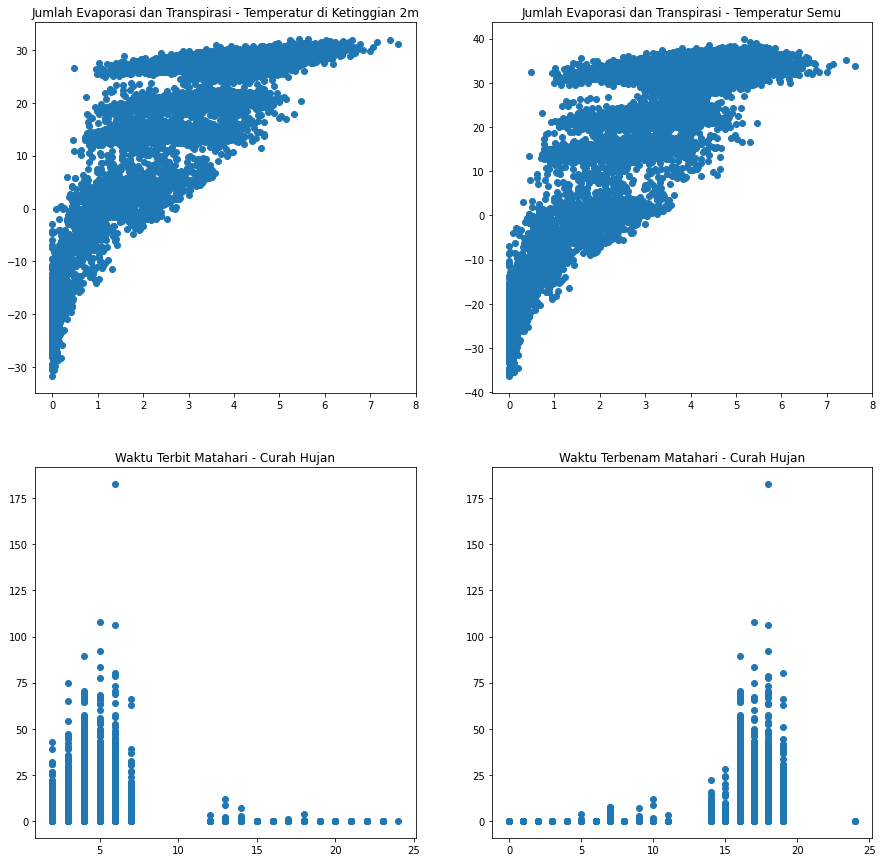

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.title.set_text('Jumlah Evaporasi dan Transpirasi - Temperatur di Ketinggian 2m')
ax1.scatter(train['et0_fao_evapotranspiration (mm)'], train['temperature_2m_avg'])

ax2.title.set_text('Jumlah Evaporasi dan Transpirasi - Temperatur Semu')
ax2.scatter(train['et0_fao_evapotranspiration (mm)'], train['apparent_temperature_avg'])

ax3.title.set_text('Waktu Terbit Matahari - Curah Hujan')
ax3.scatter(train_preprocessed['sunrise_preprocessed'], train_preprocessed['rain_sum (mm)'])

ax4.title.set_text('Waktu Terbenam Matahari - Curah Hujan')
ax4.scatter(train_preprocessed['sunset_preprocessed'], train_preprocessed['rain_sum (mm)'])

**5. Bar Plot: Banyaknya Data Curah Hujan pada Fitur Kota, Tahun, Waktu Terbit, dan Waktu Terbenamnya Matahari**

[]

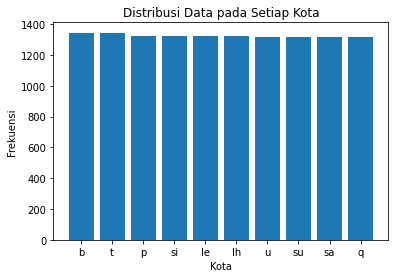

In [ ]:
plt.title('Distribusi Data pada Setiap Kota')
x = train['city'].value_counts().index
y = train['city'].value_counts().values 
plt.xlabel('Kota')
plt.ylabel('Frekuensi')
plt.bar(x,y)
plt.plot()

[]

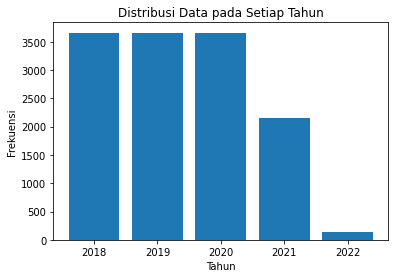

In [ ]:
plt.title('Distribusi Data pada Setiap Tahun')
x = train_preprocessed['year'].value_counts().index
y = train_preprocessed['year'].value_counts().values 
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.bar(x,y)
plt.plot()

<BarContainer object of 19 artists>

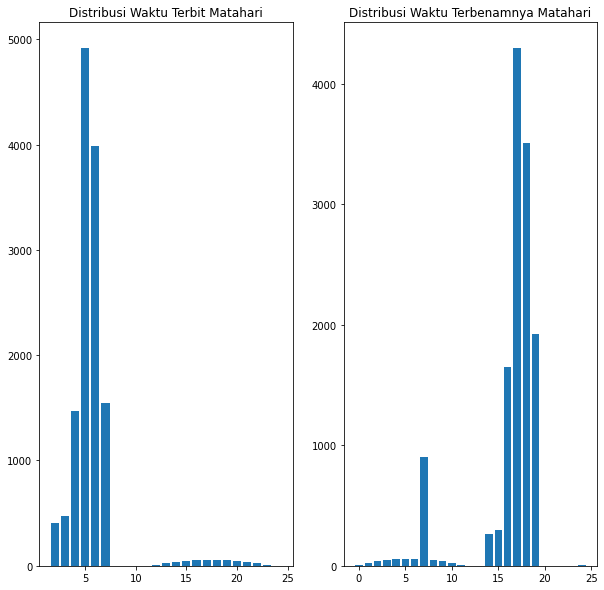

In [ ]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.title.set_text('Distribusi Waktu Terbit Matahari')
ax1.bar(train_preprocessed['sunrise_preprocessed'].value_counts().index,
        train_preprocessed['sunrise_preprocessed'].value_counts().values)

ax2.title.set_text('Distribusi Waktu Terbenamnya Matahari')
ax2.bar(train_preprocessed['sunset_preprocessed'].value_counts().index, 
        train_preprocessed['sunset_preprocessed'].value_counts().values)

**6. Pie Chart: Distribusi Data pada Fitur Kota dan Tahun**

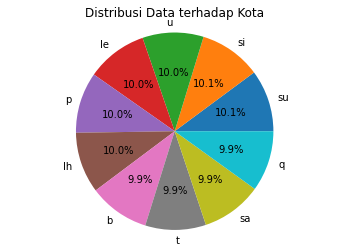

In [ ]:
plt.title("Distribusi Data terhadap Kota")

plt.pie(train['city'].value_counts(), labels = train['city'].unique(), 
        autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

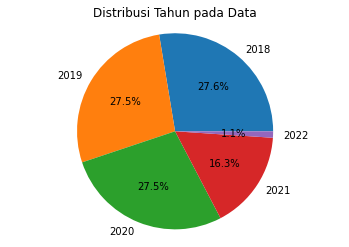

In [ ]:
plt.title("Distribusi Tahun pada Data")

plt.pie(train_preprocessed['year'].value_counts(), 
        labels = train_preprocessed['year'].unique(), 
        autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

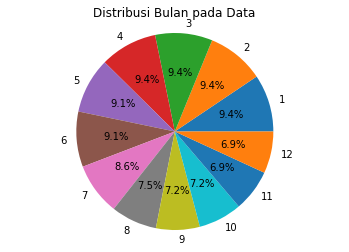

In [ ]:
plt.title("Distribusi Bulan pada Data")

plt.pie(train_preprocessed['month'].value_counts(), 
        labels = train_preprocessed['month'].unique(), 
        autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

**7. Distplot: Distribusi pada Fitur dengan Tipe Data Numerik**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(*args, **kw)>

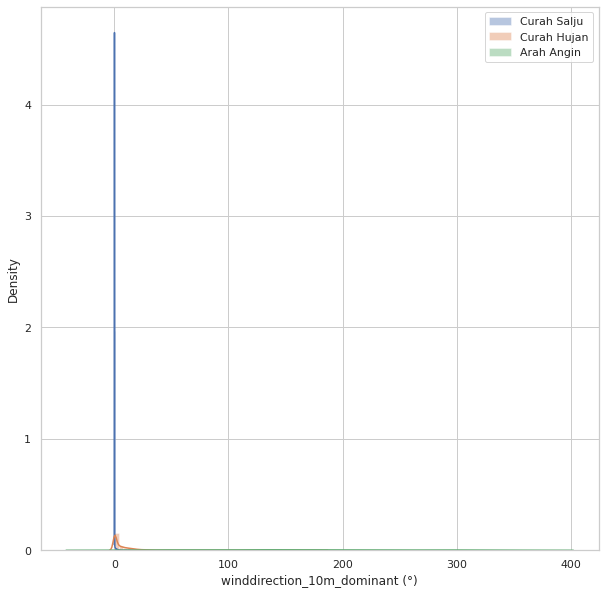

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
sns.distplot(train['snowfall_sum (cm)'], label = 'Curah Salju')
sns.distplot(train['rain_sum (mm)'], label = 'Curah Hujan')
sns.distplot(train['winddirection_10m_dominant (°)'], label = 'Arah Angin')
plt.legend()
plt.show

In [ ]:
train_preprocessed['sunset_preprocessed'].value_counts()

17    4294
18    3509
19    1925
16    1650
7      906
15     296
14     267
6       59
5       59
4       55
3       50
8       47
9       38
2       37
1       26
10      23
0        7
11       7
24       3
Name: sunset_preprocessed, dtype: int64

##**Visualisasi Bagian 2: Dataset Train Hourly**##

Secara umum, tahapan ini serupa dengan yang sudah dilakukan sebelumnya pada dataset train dan test

**1. Heatmap: Korelasi Antar Fitur Secara Umum**

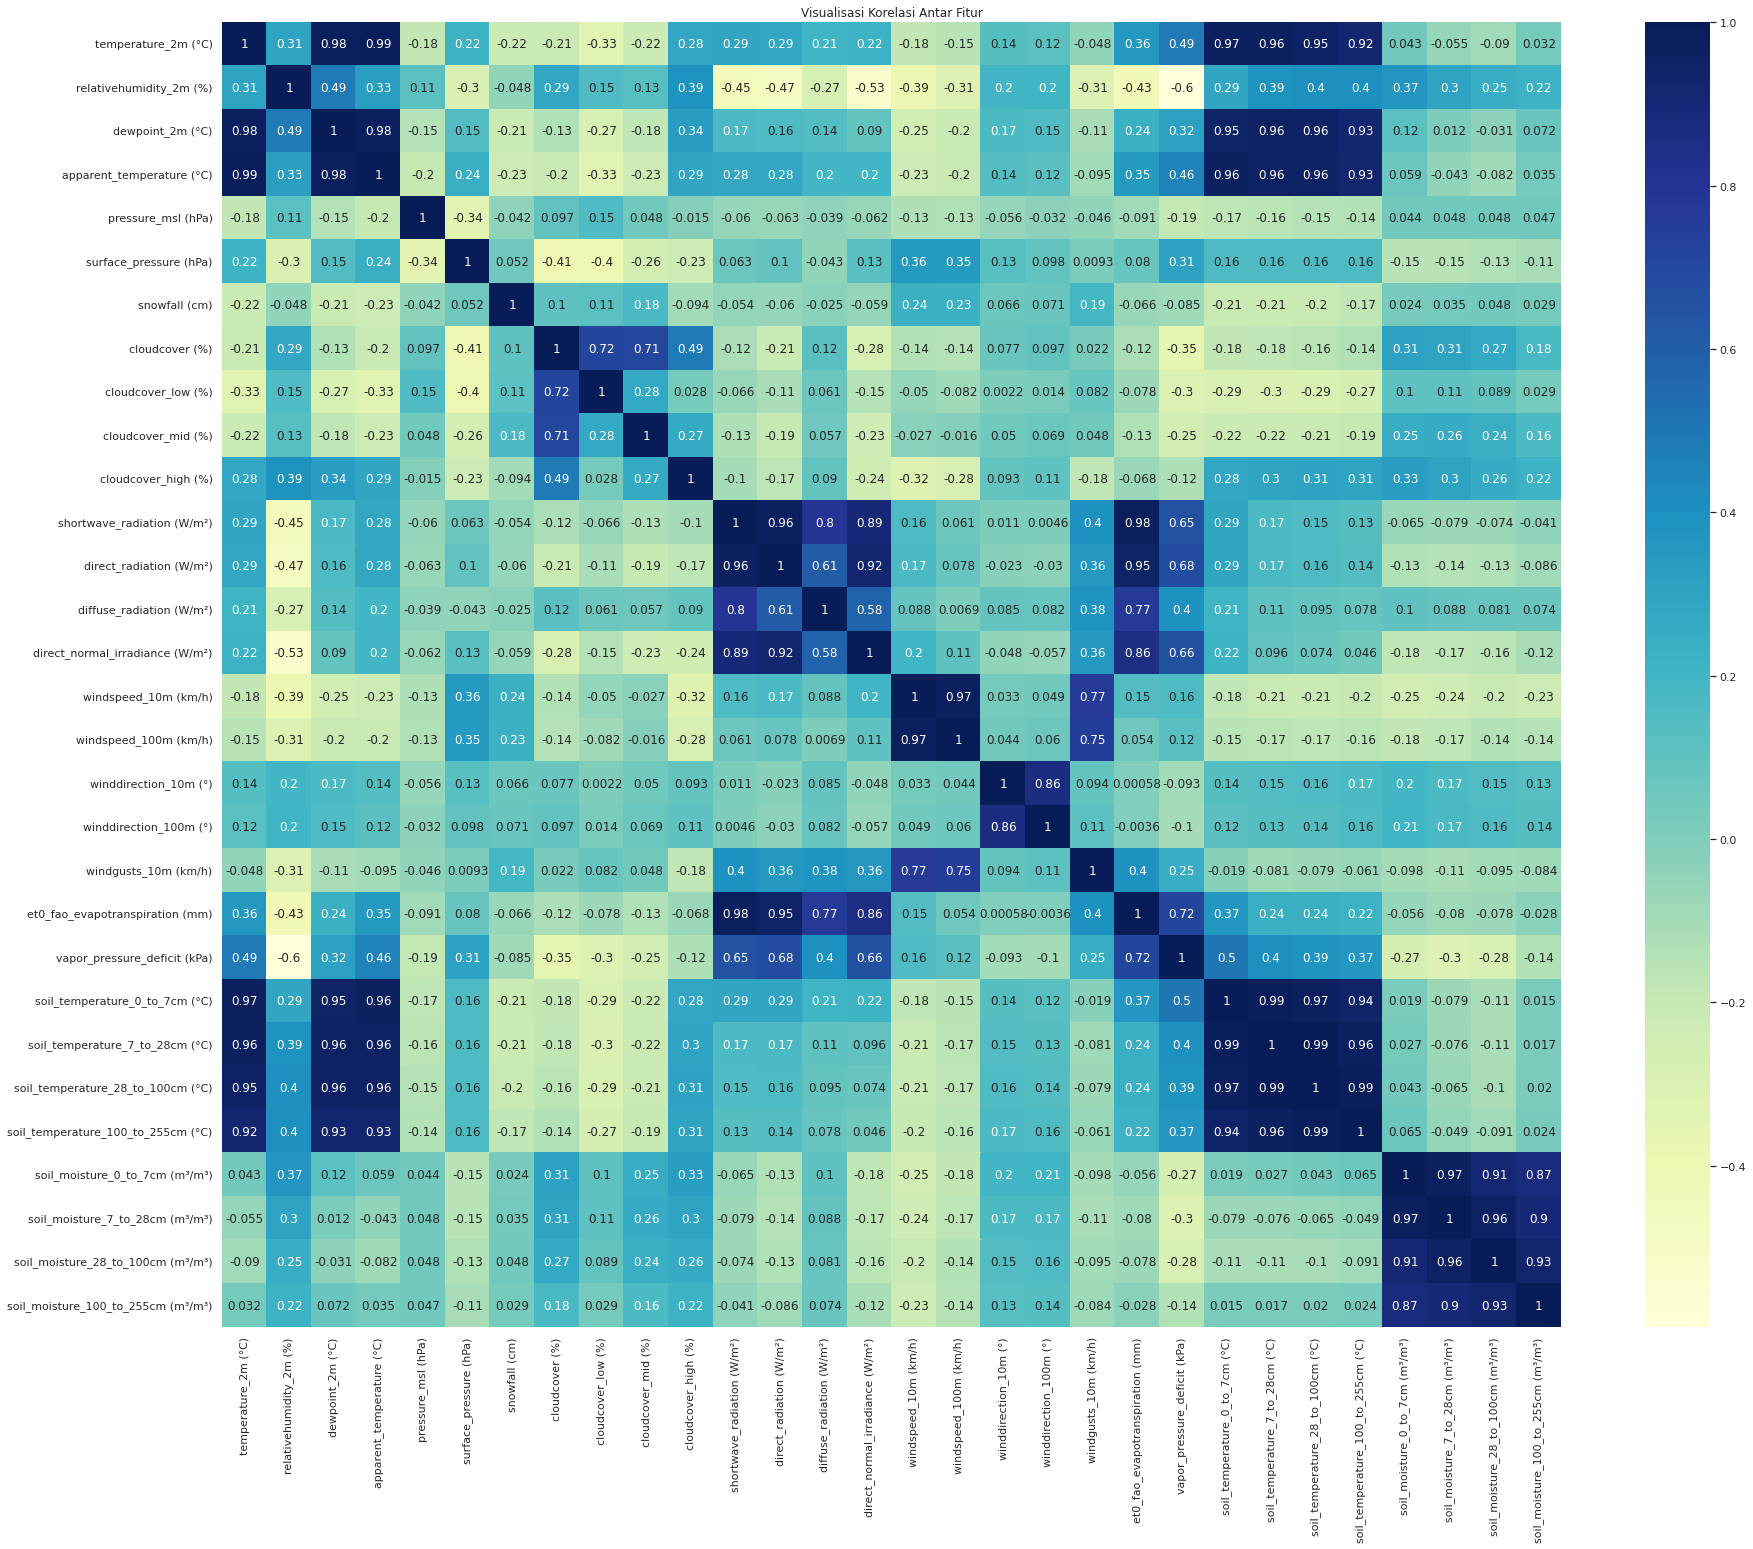

In [ ]:
plt.figure(figsize=(30,24))
plt.title('Visualisasi Korelasi Antar Fitur')
correlation = train_hourly.corr()
dataplot = sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

**2. Scatter Plot: Korelasi Antar Fitur Lanjutan**

In [ ]:
train_hourly.columns

Index(['time', 'temperature_2m (°C)', 'relativehumidity_2m (%)',
       'dewpoint_2m (°C)', 'apparent_temperature (°C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'snowfall (cm)', 'cloudcover (%)',
       'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'windspeed_10m (km/h)', 'windspeed_100m (km/h)',
       'winddirection_10m (°)', 'winddirection_100m (°)',
       'windgusts_10m (km/h)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'city'],
      dtype='object')

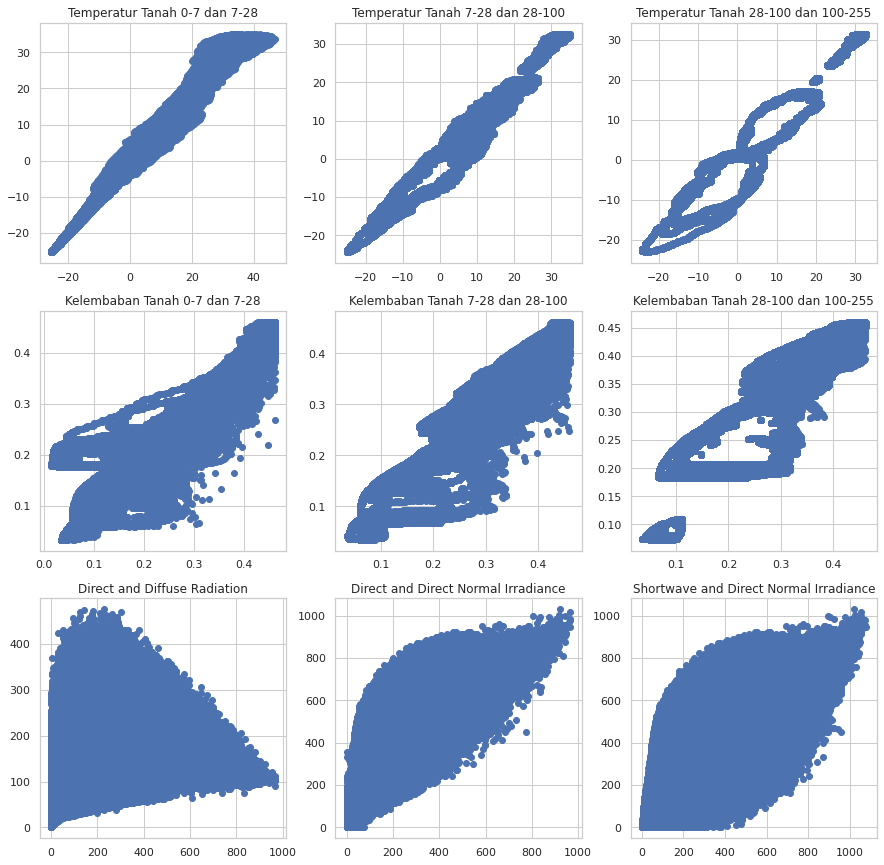

In [ ]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)


ax1.title.set_text('Temperatur Tanah 0-7 dan 7-28')
ax1.scatter(train_hourly['soil_temperature_0_to_7cm (°C)'],
        train_hourly['soil_temperature_7_to_28cm (°C)'])

ax2.title.set_text('Temperatur Tanah 7-28 dan 28-100')
ax2.scatter(train_hourly['soil_temperature_7_to_28cm (°C)'],
        train_hourly['soil_temperature_28_to_100cm (°C)'])

ax3.title.set_text('Temperatur Tanah 28-100 dan 100-255')
ax3.scatter(train_hourly['soil_temperature_28_to_100cm (°C)'],
        train_hourly['soil_temperature_100_to_255cm (°C)'])

ax4.title.set_text('Kelembaban Tanah 0-7 dan 7-28')
ax4.scatter(train_hourly['soil_moisture_0_to_7cm (m³/m³)'],
        train_hourly['soil_moisture_7_to_28cm (m³/m³)'])

ax5.title.set_text('Kelembaban Tanah 7-28 dan 28-100')
ax5.scatter(train_hourly['soil_moisture_7_to_28cm (m³/m³)'],
        train_hourly['soil_moisture_28_to_100cm (m³/m³)'])

ax6.title.set_text('Kelembaban Tanah 28-100 dan 100-255')
ax6.scatter(train_hourly['soil_moisture_28_to_100cm (m³/m³)'],
        train_hourly['soil_moisture_100_to_255cm (m³/m³)'])

ax7.title.set_text('Direct and Diffuse Radiation')
ax7.scatter(train_hourly['direct_radiation (W/m²)'],
        train_hourly['diffuse_radiation (W/m²)'])

ax8.title.set_text('Direct and Direct Normal Irradiance')
ax8.scatter(train_hourly['direct_radiation (W/m²)'],
        train_hourly['direct_normal_irradiance (W/m²)'])

ax9.title.set_text('Shortwave and Direct Normal Irradiance')
ax9.scatter(train_hourly['shortwave_radiation (W/m²)'],
        train_hourly['direct_normal_irradiance (W/m²)'])


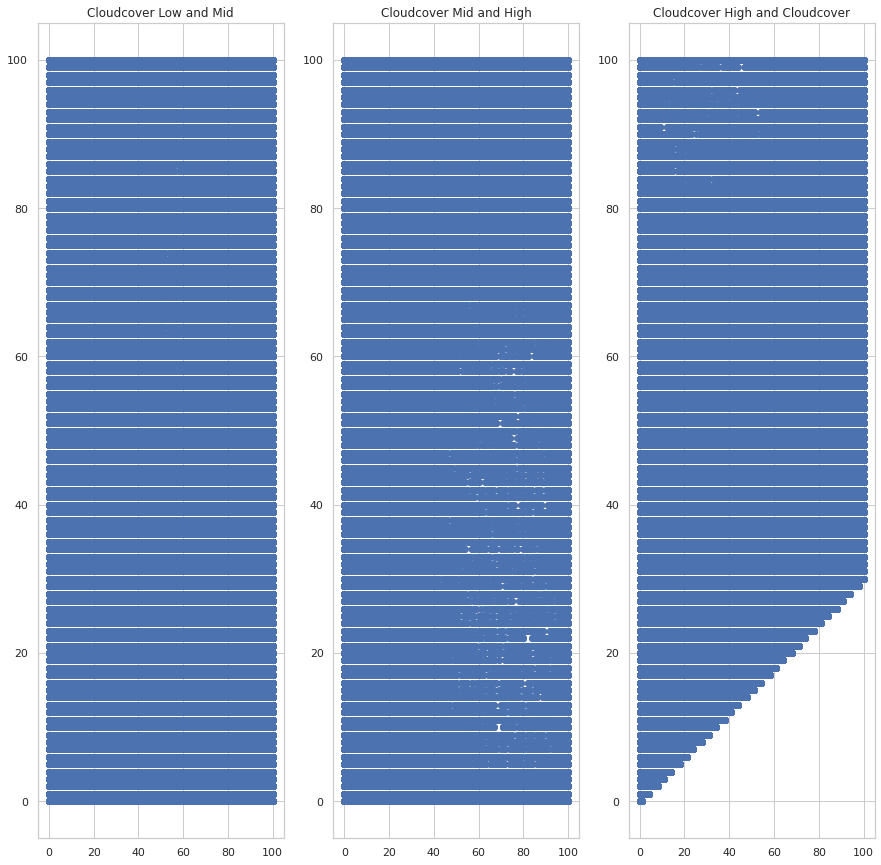

In [ ]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.title.set_text('Cloudcover Low and Mid')
ax1.scatter(train_hourly['cloudcover_low (%)'],
        train_hourly['cloudcover_mid (%)'])

ax2.title.set_text('Cloudcover Mid and High')
ax2.scatter(train_hourly['cloudcover_mid (%)'],
        train_hourly['cloudcover_high (%)'])

ax3.title.set_text('Cloudcover High and Cloudcover')
ax3.scatter(train_hourly['cloudcover_high (%)'],
        train_hourly['cloudcover (%)'])

**3. Distplot: Distribusi Fitur dengan Tipe Data Numerik**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(*args, **kw)>

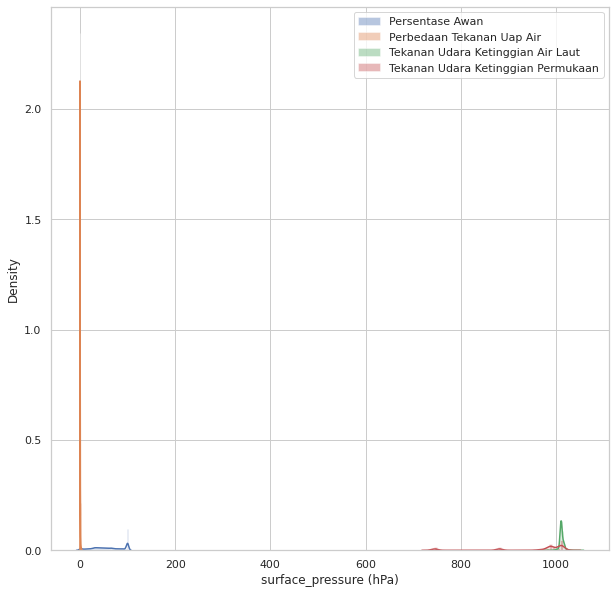

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
sns.distplot(train_hourly['cloudcover (%)'], label = 'Persentase Awan')
sns.distplot(train_hourly['vapor_pressure_deficit (kPa)'], label = 'Perbedaan Tekanan Uap Air')
sns.distplot(train_hourly['pressure_msl (hPa)'], label = 'Tekanan Udara Ketinggian Air Laut')
sns.distplot(train_hourly['surface_pressure (hPa)'], label = 'Tekanan Udara Ketinggian Permukaan')
plt.legend()
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

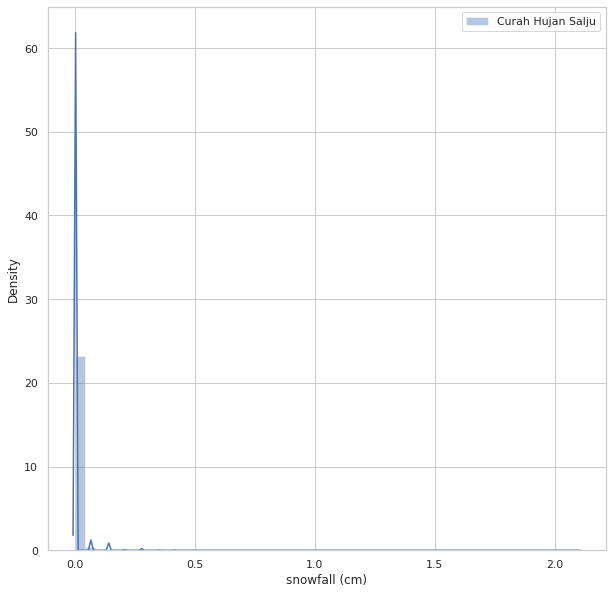

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
sns.distplot(train_hourly['snowfall (cm)'], label = 'Curah Hujan Salju')
plt.legend()
plt.show

Dari visualisasi yang sudah dilakukan, didapatkan *insight* sebagai berikut:

- Fitur **snowfall_sum** pada train dan test hourly harus di drop karena korelasinya terhadap fitur lain tidak dapat ditentukan

- Terdapat sejumlah fitur yang dapat diubah ke dalam bentuk kategorik, 
diantaranya **elevation**, **sunrise**, **sunset**, **snowfall_sum**, **year**, **month**.

- Fitur yang membentuk korelasi dalam bentuk garis lurus terhadap fitur lainnya dapat di drop, seperti terlihat pada temperatur maksimum dan minimum pada ketinggian 2m serta temperatur semu maksimum dan minimum.

- Solusi lain untuk mengatasi korelasi yang tinggi dapat dilakukan juga dengan membuat fitur baru yang merupakan kombinasi dari dua fitur yang sudah ada, lalu menghapus dua fitur sebelumnya.

- Berdasarkan grafik distribusi fitur, dapat dilihat bahwa terdapat sejumlah fitur yang skew kanan dan skew kiri. Metode normalisasi seperti Log Transform dan Square Transform dapat digunakan untuk menormalkan distribusi tersebut.

- Keberadaan outlier seperti yang terdapat pada distribusi curah hujan di tiap kota dapat diatasi menggunakan metode Scaler, salah satunya Robust Scaler
